# Alzheimer's Disease Prediction: Statistical Learning Midterm Project
---
R11323024 Fan Wei-Yu
---

## 1. Data Processing and Exploration

In this section, we will import the necessary libraries, load the dataset, and perform preliminary data exploration and preprocessing.

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
sns.set_context('talk')

In [38]:
# Load the Alzheimer's disease dataset
data_path = 'data/alzheimers_disease_data.csv'
alzheimer_data = pd.read_csv(data_path)

# Display the first few rows of data
alzheimer_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### 1.1 Data Quality Check

First, check for missing values, duplicates, or other data quality issues.

In [39]:
# Check for missing values
missing_values = alzheimer_data.isnull().sum().sort_values(ascending=False)
print("Missing value count (top 10 columns):")
print(missing_values.head(10))

Missing value count (top 10 columns):
PatientID                   0
BehavioralProblems          0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
MMSE                        0
FunctionalAssessment        0
MemoryComplaints            0
ADL                         0
DiastolicBP                 0
dtype: int64


In [40]:
# Check data types and basic information
print("Data types and non-null counts:")
alzheimer_data.info()

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes        

In [41]:
# Check for duplicate patient IDs
duplicate_ids = alzheimer_data['PatientID'].duplicated().sum()
print(f"Number of duplicate patient IDs: {duplicate_ids}")

Number of duplicate patient IDs: 0


In [42]:
# View basic statistics of the dataset
summary_stats = alzheimer_data.describe(include='all')
print("Data summary statistics:")
print(summary_stats)

Data summary statistics:
          PatientID          Age       Gender    Ethnicity  EducationLevel  \
count   2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
unique          NaN          NaN          NaN          NaN             NaN   
top             NaN          NaN          NaN          NaN             NaN   
freq            NaN          NaN          NaN          NaN             NaN   
mean    5825.000000    74.908795     0.506282     0.697534        1.286645   
std      620.507185     8.990221     0.500077     0.996128        0.904527   
min     4751.000000    60.000000     0.000000     0.000000        0.000000   
25%     5288.000000    67.000000     0.000000     0.000000        1.000000   
50%     5825.000000    75.000000     1.000000     0.000000        1.000000   
75%     6362.000000    83.000000     1.000000     1.000000        2.000000   
max     6899.000000    90.000000     1.000000     3.000000        3.000000   

                BMI      Smoking  Alco

### 1.2 Data Preprocessing

Next, perform feature engineering and data transformation, including:
1. Categorical variable encoding (such as ethnicity and education level)
2. Converting binary variables to boolean type
3. Standardizing continuous variables using traning data

In [43]:
# Map ethnicity and education level to meaningful names
ethnicity_mapping = {0: 'Caucasian', 1: 'AfricanAmerican', 2: 'Asian', 3: 'Other'}
education_mapping = {0: 'None', 1: 'HighSchool', 2: 'Bachelors', 3: 'Higher'}

# Apply mapping
alzheimer_data['Ethnicity'] = alzheimer_data['Ethnicity'].map(ethnicity_mapping)
alzheimer_data['EducationLevel'] = alzheimer_data['EducationLevel'].map(education_mapping)

# One-hot encode categorical variables
alzheimer_data = pd.get_dummies(alzheimer_data, columns=['Ethnicity', 'EducationLevel'], drop_first=True)

In [44]:
# Drop unnecessary columns (patient ID and doctor information)
alzheimer_data = alzheimer_data.drop(columns=['PatientID', 'DoctorInCharge'])

In [45]:
# Convert binary columns to boolean type
binary_columns = [
    'Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 
    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'
]

# Convert to boolean type
alzheimer_data[binary_columns] = alzheimer_data[binary_columns].astype(bool)

# Display statistics for binary columns
print("Distribution of binary variables after conversion:")
print(alzheimer_data[binary_columns].mean().sort_values(ascending=False))

Distribution of binary variables after conversion:
Gender                       0.506282
Diagnosis                    0.353653
Forgetfulness                0.301536
Smoking                      0.288506
FamilyHistoryAlzheimers      0.252210
MemoryComplaints             0.208004
Confusion                    0.205212
Depression                   0.200558
DifficultyCompletingTasks    0.158678
Disorientation               0.158213
BehavioralProblems           0.156817
Diabetes                     0.150768
PersonalityChanges           0.150768
Hypertension                 0.148906
CardiovascularDisease        0.144253
HeadInjury                   0.092601
dtype: float64


In [93]:
# Standardize continuous variables
continuous_columns = [
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 
    'CholesterolHDL', 'CholesterolTriglycerides', 'Age', 'BMI', 
    'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
    'MMSE', 'FunctionalAssessment', 'ADL'
]

# Perform train-test split


# Standardize the continuous variables using training sample mean and variance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = alzheimer_data.drop('Diagnosis', axis=1)
y = alzheimer_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train[continuous_columns])
alzheimer_data[continuous_columns] = scaler.transform(alzheimer_data[continuous_columns])
X_train[continuous_columns] = scaler.transform(X_train[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])
# Print statistics after standardizationandardization
print("Statistics of continuous variables after standardization:")
print(alzheimer_data[continuous_columns].describe().T[['mean', 'std']])

Statistics of continuous variables after standardization:
                              mean       std
SystolicBP               -0.000311  1.002760
DiastolicBP               0.023172  0.990574
CholesterolTotal          0.006920  0.998801
CholesterolLDL           -0.002875  1.000823
CholesterolHDL            0.021960  0.996688
CholesterolTriglycerides -0.009693  0.993105
Age                      -0.005699  0.992039
BMI                      -0.004400  1.001422
AlcoholConsumption        0.010615  0.996923
PhysicalActivity         -0.007781  1.010860
DietQuality               0.007181  1.003096
SleepQuality              0.007418  1.003367
MMSE                      0.001984  0.997260
FunctionalAssessment      0.003588  1.001090
ADL                       0.004145  1.001027


### 1.3 Exploratory Data Analysis

Next, explore the distribution of data and relationships between features.

Alzheimer's diagnosis distribution:
Diagnosis
False    1389
True      760
Name: count, dtype: int64


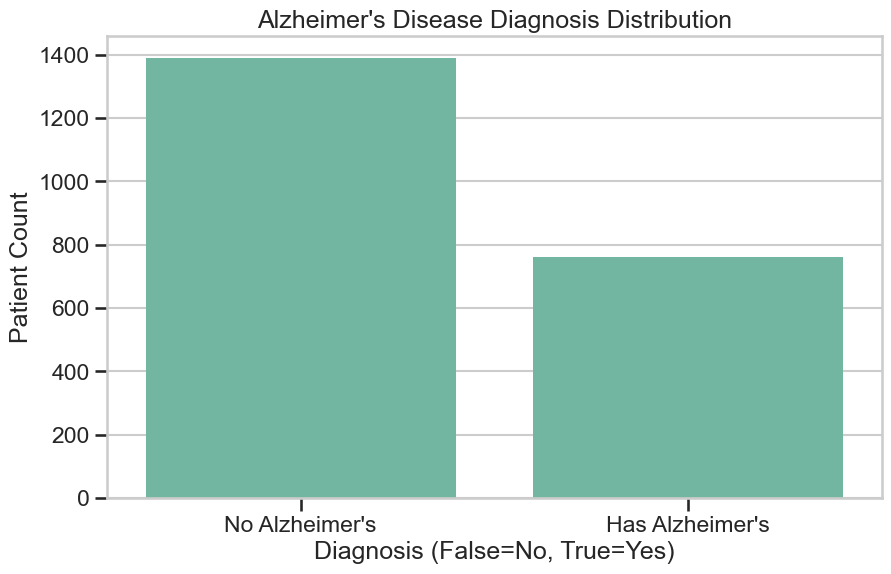

In [47]:
# Check the distribution of the target variable
diagnosis_counts = alzheimer_data['Diagnosis'].value_counts()
print("Alzheimer's diagnosis distribution:")
print(diagnosis_counts)

# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=alzheimer_data)
plt.title('Alzheimer\'s Disease Diagnosis Distribution')
plt.xlabel('Diagnosis (False=No, True=Yes)')
plt.ylabel('Patient Count')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Has Alzheimer\'s'])
plt.show()

Features most correlated with Alzheimer's diagnosis:
Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
EducationLevel_None          0.039049
Ethnicity_Asian              0.036854
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
Ethnicity_Caucasian          0.021870
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
Name: Diagnosis, dtype: float64


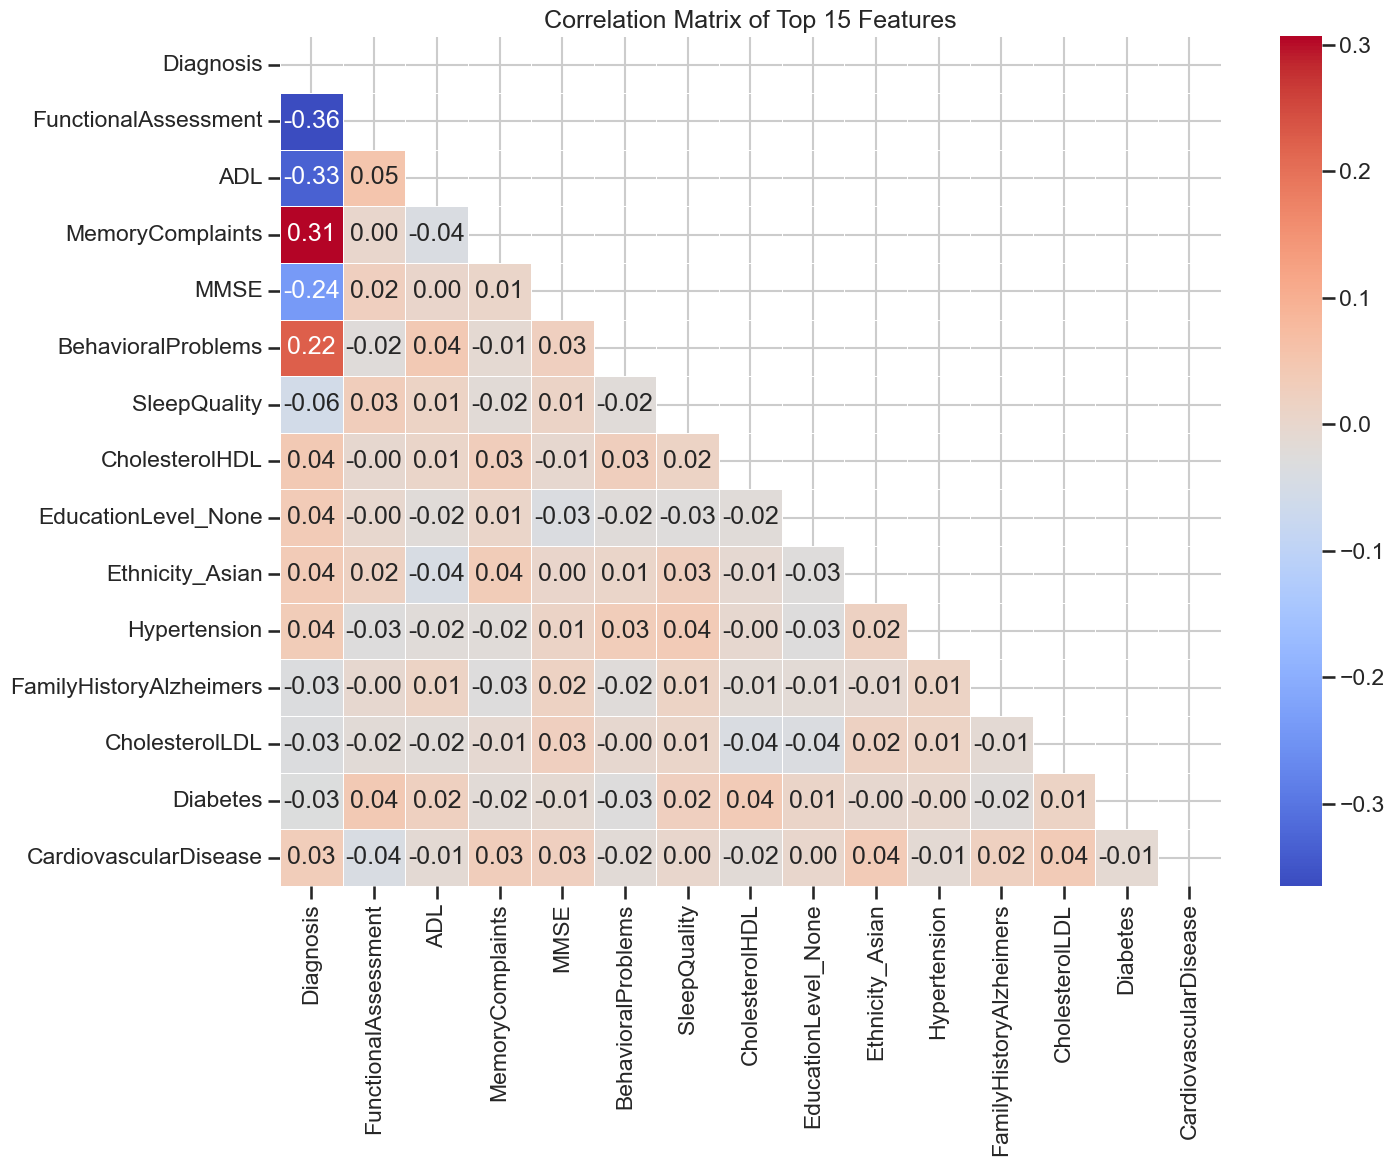

In [48]:
# Calculate correlations with the target variable
target_correlations = alzheimer_data.corr(numeric_only=False)['Diagnosis'].sort_values(ascending=False)
print("Features most correlated with Alzheimer's diagnosis:")
print(target_correlations.head(15))

# Visualize correlation matrix for top 15 features
plt.figure(figsize=(15, 12))
top_features = target_correlations.abs().sort_values(ascending=False)[:15].index
correlation_matrix = alzheimer_data[top_features].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            linewidths=0.5, fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Top 15 Features')
plt.tight_layout()
plt.show()

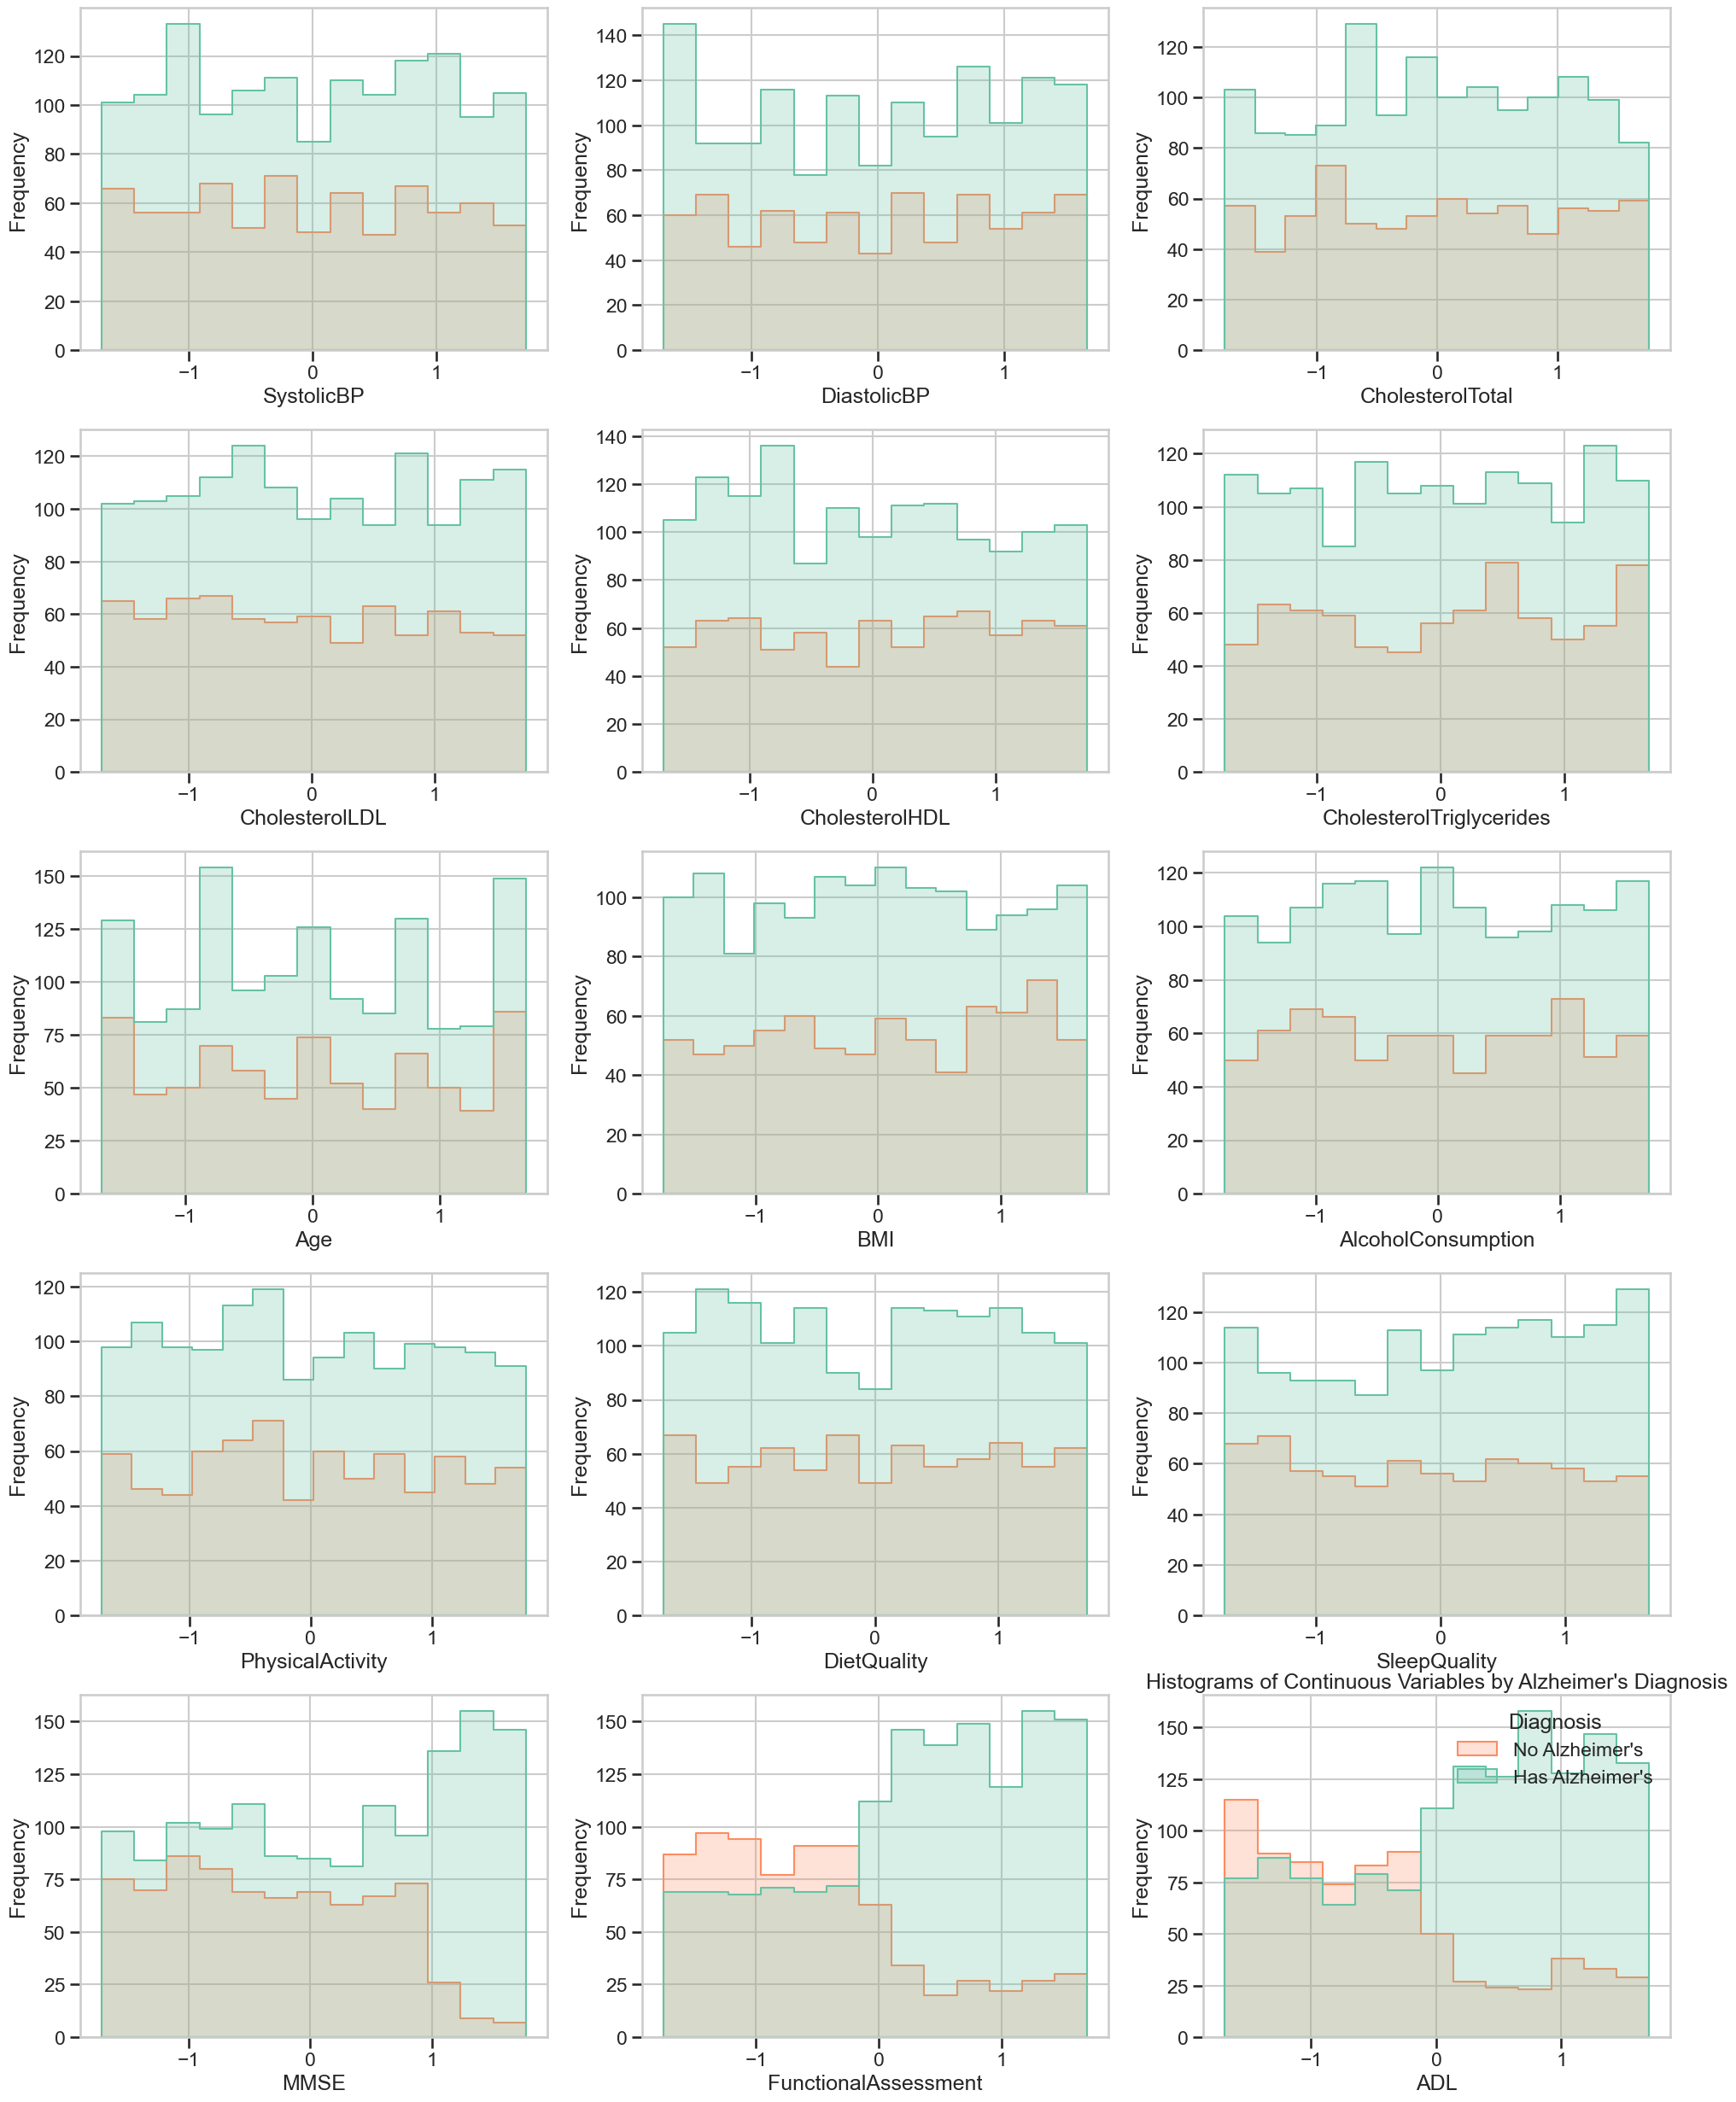

In [49]:
# Plot histograms for continuous columns with colors based on Diagnosis
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(continuous_columns):
    sns.histplot(
        data=alzheimer_data, 
        x=column, 
        hue='Diagnosis', 
        ax=axes[i], 
        palette='Set2', 
        element='step', 
        legend=False
    )
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(continuous_columns), len(axes)):
    fig.delaxes(axes[j])
    # Add a single legend for the entire figure
plt.tight_layout()
plt.title('Histograms of Continuous Variables by Alzheimer\'s Diagnosis')
plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Has Alzheimer\'s'])
plt.show()

## 2. Model Training and Evaluation

This section will implement various classification methods including logistic regression, random forest, and XGBoost, and compare these methods.

### 2.1 Imoort Libraries


In [ ]:
# Import necessary machine learning libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

Training set size: 1719 samples
Test set size: 430 samples


### 2.2 Logistic Regression Model

In [51]:
# Define logistic regression model
logistic_model = LogisticRegression()

# Define hyperparameter grid
logistic_param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-2, 2, 200),  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500, 1000]
}

# Use grid search for hyperparameter tuning
logistic_grid_search = GridSearchCV(
    logistic_model, 
    param_grid=logistic_param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
logistic_grid_search.fit(X_train, y_train)

# Get the best model
best_logistic = logistic_grid_search.best_estimator_

# Display best hyperparameters
print("Best hyperparameters for logistic regression:")
print(logistic_grid_search.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best hyperparameters for logistic regression:
{'C': 0.7401959996915645, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [79]:
# Evaluate the best logistic regression model
print(f"Logistic Regression accuracy: {best_logistic.score(X_test, y_test)*100:.2f}%")

Logistic Regression accuracy: 82.79%


### 2.3 Random Forest Model

In [53]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': np.arange(5, 50, 10)
}

# Use grid search for hyperparameter tuning
rf_grid_search = GridSearchCV(
    rf_model, 
    param_grid=rf_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Display best hyperparameters
print("Best hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
Best hyperparameters for Random Forest:
{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 90}


In [77]:
# Evaluate the best random forest model
print(f"Random Forest accuracy: {best_rf.score(X_test, y_test)*100:.2f}%")

Random Forest accuracy: 93.72%


### 2.4 XGBoost Model

In [55]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='error',
    random_state=42
)

# Define hyperparameter grid
xgb_param_grid = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

# Use grid search for hyperparameter tuning
xgb_grid_search = GridSearchCV(
    xgb_model, 
    param_grid=xgb_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = xgb_grid_search.best_estimator_

# Display best hyperparameters
print("XGBoost best hyperparameters:")
print(xgb_grid_search.best_params_)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
XGBoost best hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.7}


In [75]:
print(f"XGBoost accuracy: {best_xgb.score(X_test, y_test)*100:.2f}%")

XGBoost accuracy: 94.88%


## 3. Model Comparison and Evaluation

Next, we'll compare all models' performance and evaluate their respective strengths and weaknesses.

### 3.1 Model Performance Comparison

In [57]:
# Evaluate models
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
    print(f"F1-Score: {f1_score(y_test, y_pred) * 100:.2f}%")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob) * 100:.2f}%")
    print("-" * 50)

In [58]:
# Evaluate all models
evaluate_model(best_logistic, X_test, y_test, "Logistic Regression")
evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

Performance Metrics for Logistic Regression:
Accuracy: 82.79%
Precision: 78.42%
Recall: 71.24%
F1-Score: 74.66%
ROC-AUC: 89.36%
--------------------------------------------------
Performance Metrics for Random Forest:
Accuracy: 93.72%
Precision: 96.32%
Recall: 85.62%
F1-Score: 90.66%
ROC-AUC: 94.73%
--------------------------------------------------
Performance Metrics for XGBoost:
Accuracy: 94.88%
Precision: 95.17%
Recall: 90.20%
F1-Score: 92.62%
ROC-AUC: 94.50%
--------------------------------------------------


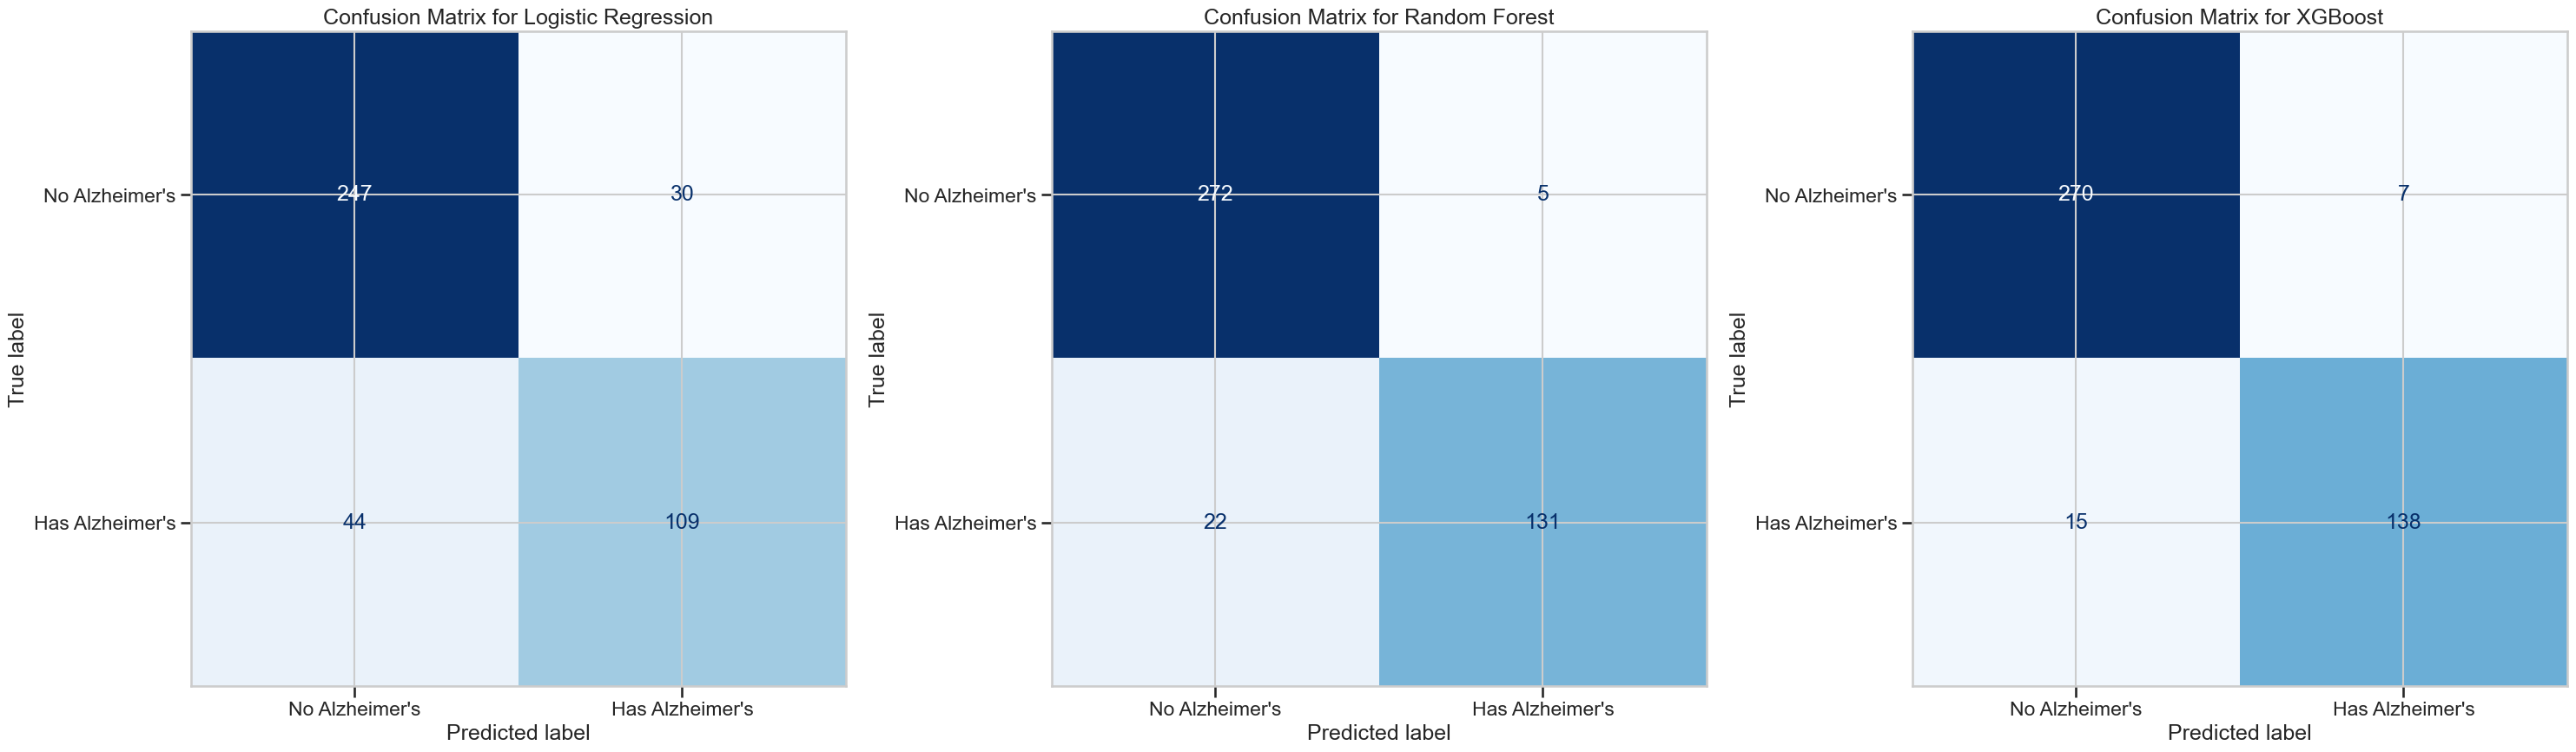

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(30, 12))
models = [
    ("Logistic Regression", best_logistic.predict(X_test)),
    ("Random Forest", best_rf.predict(X_test)),
    ("XGBoost", best_xgb.predict(X_test))
    ]
for ax, (model_name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alzheimer\'s', 'Has Alzheimer\'s'])
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")
plt.tight_layout()
plt.show()

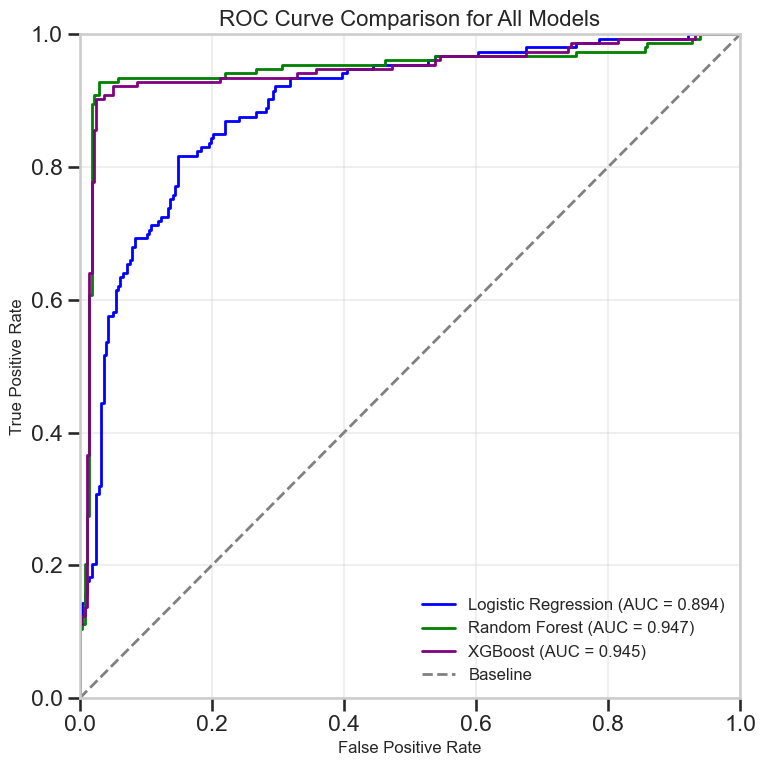

In [60]:
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, best_logistic.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb) 
# Compare ROC curves for all models
plt.figure(figsize=(8, 8))

# Plot Logistic Regression ROC curve
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_logistic:.3f})')

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, 
         label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')

# Plot baseline
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Baseline')

# Enhance chart
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison for All Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Feature Importance Comparison

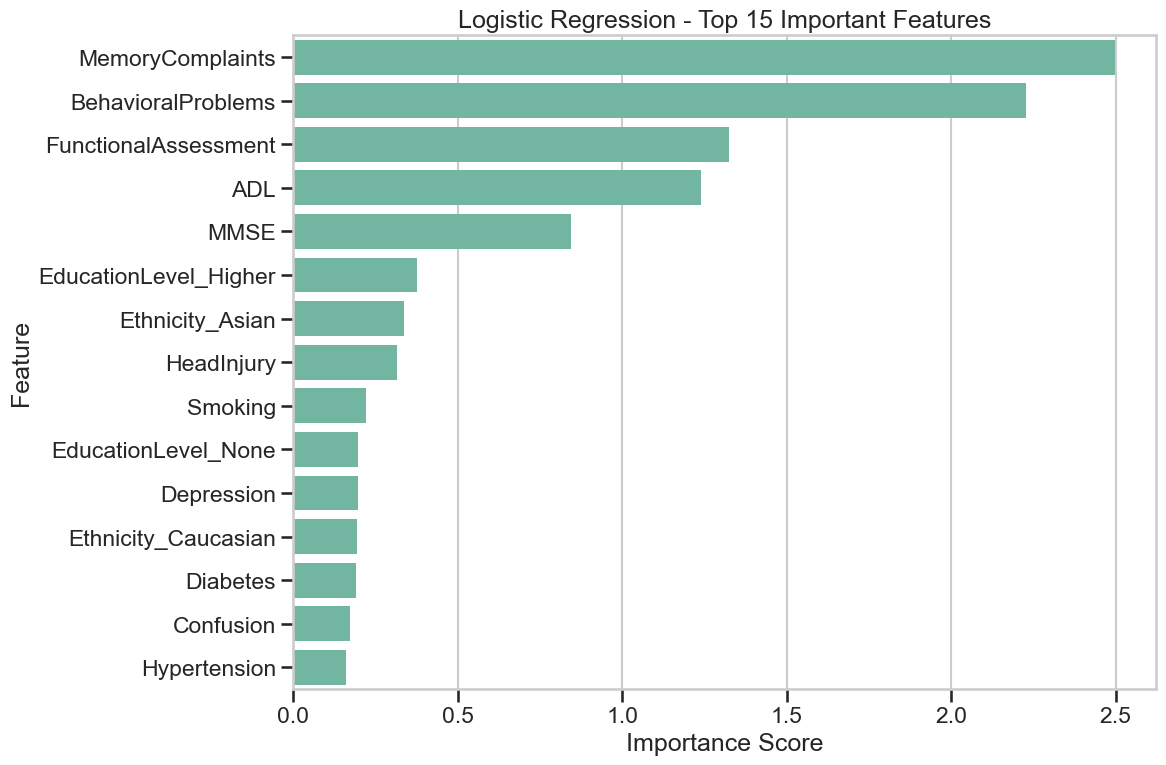

Logistic Regression Feature Importance:
                  Feature  AbsCoefficient
22       MemoryComplaints        2.497947
23     BehavioralProblems        2.226043
21   FunctionalAssessment        1.324910
24                    ADL        1.240552
20                   MMSE        0.845319
34  EducationLevel_Higher        0.375613
30        Ethnicity_Asian        0.335090
12             HeadInjury        0.316163
3                 Smoking        0.219845
35    EducationLevel_None        0.197365


In [61]:
# Get coefficients from logistic regression
logistic_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_logistic.coef_[0]
})

# Sort by absolute coefficient values
logistic_coefficients['AbsCoefficient'] = logistic_coefficients['Coefficient'].abs()
logistic_coefficients = logistic_coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='AbsCoefficient', y='Feature', data=logistic_coefficients.head(15))
plt.title('Logistic Regression - Top 15 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print feature importance
print("Logistic Regression Feature Importance:")
print(logistic_coefficients[['Feature', 'AbsCoefficient']].head(10))

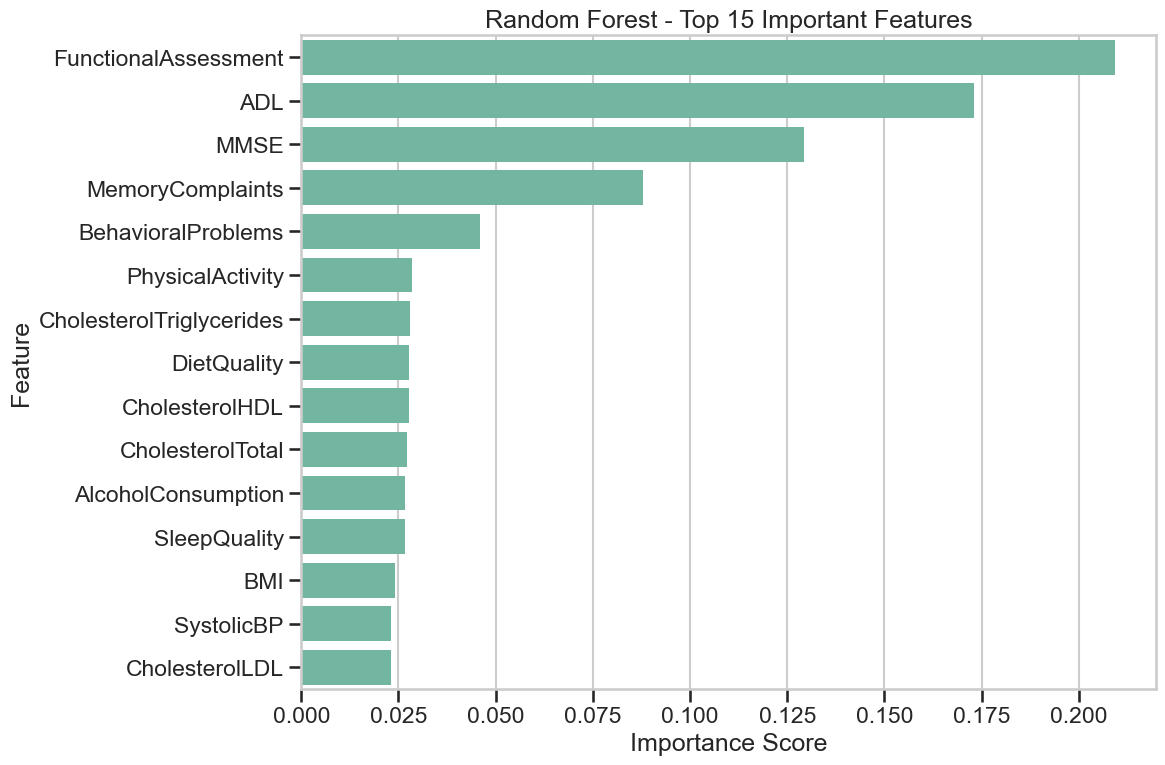

Random Forest Feature Importance:
                     Feature  Importance
21      FunctionalAssessment    0.209406
24                       ADL    0.172956
20                      MMSE    0.129361
22          MemoryComplaints    0.087884
23        BehavioralProblems    0.046012
5           PhysicalActivity    0.028575
19  CholesterolTriglycerides    0.027850
6                DietQuality    0.027718
18            CholesterolHDL    0.027686
16          CholesterolTotal    0.027093


In [62]:
# Get feature importance from Random Forest
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(15))
plt.title('Random Forest - Top 15 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print feature importance
print("Random Forest Feature Importance:")
print(rf_importance[['Feature', 'Importance']].head(10))

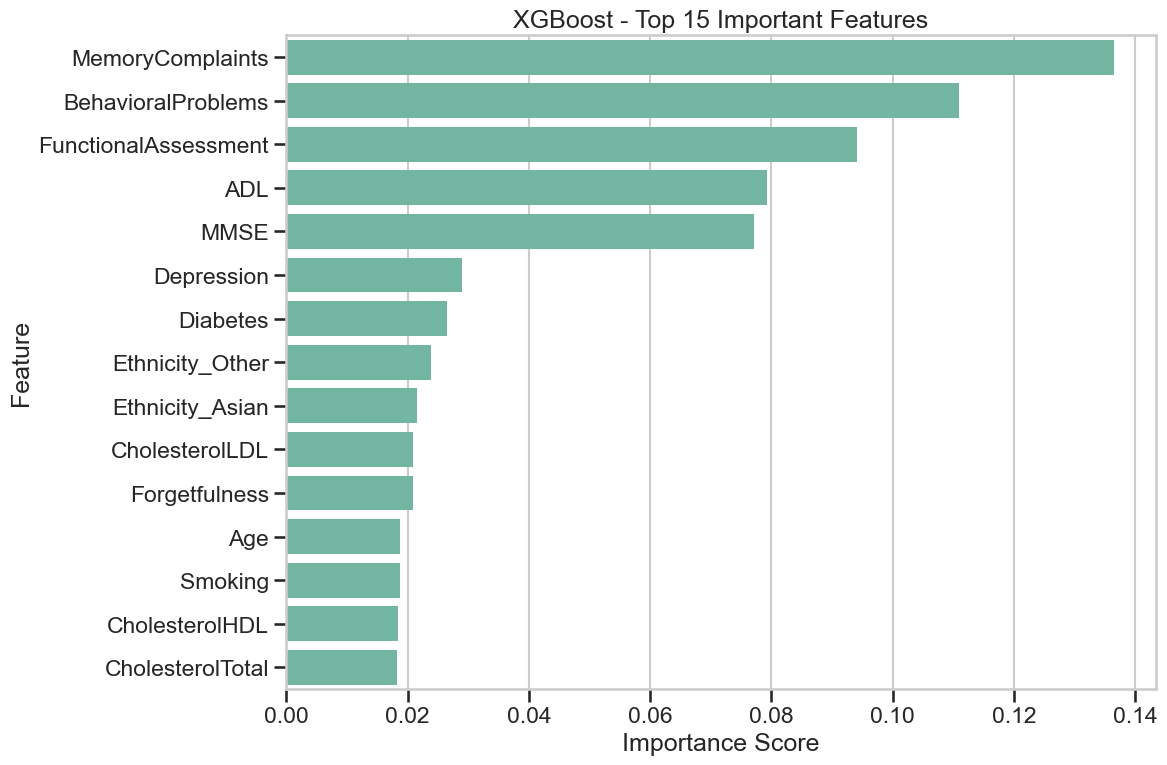

XGBoost Feature Importance:
                 Feature  Importance
22      MemoryComplaints    0.136571
23    BehavioralProblems    0.110962
21  FunctionalAssessment    0.094044
24                   ADL    0.079250
20                  MMSE    0.077124
11            Depression    0.028971
10              Diabetes    0.026509
32       Ethnicity_Other    0.023793
30       Ethnicity_Asian    0.021460
17        CholesterolLDL    0.020857


In [63]:
# Get feature importance from XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15))
plt.title('XGBoost - Top 15 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print feature importance
print("XGBoost Feature Importance:")
print(xgb_importance[['Feature', 'Importance']].head(10))

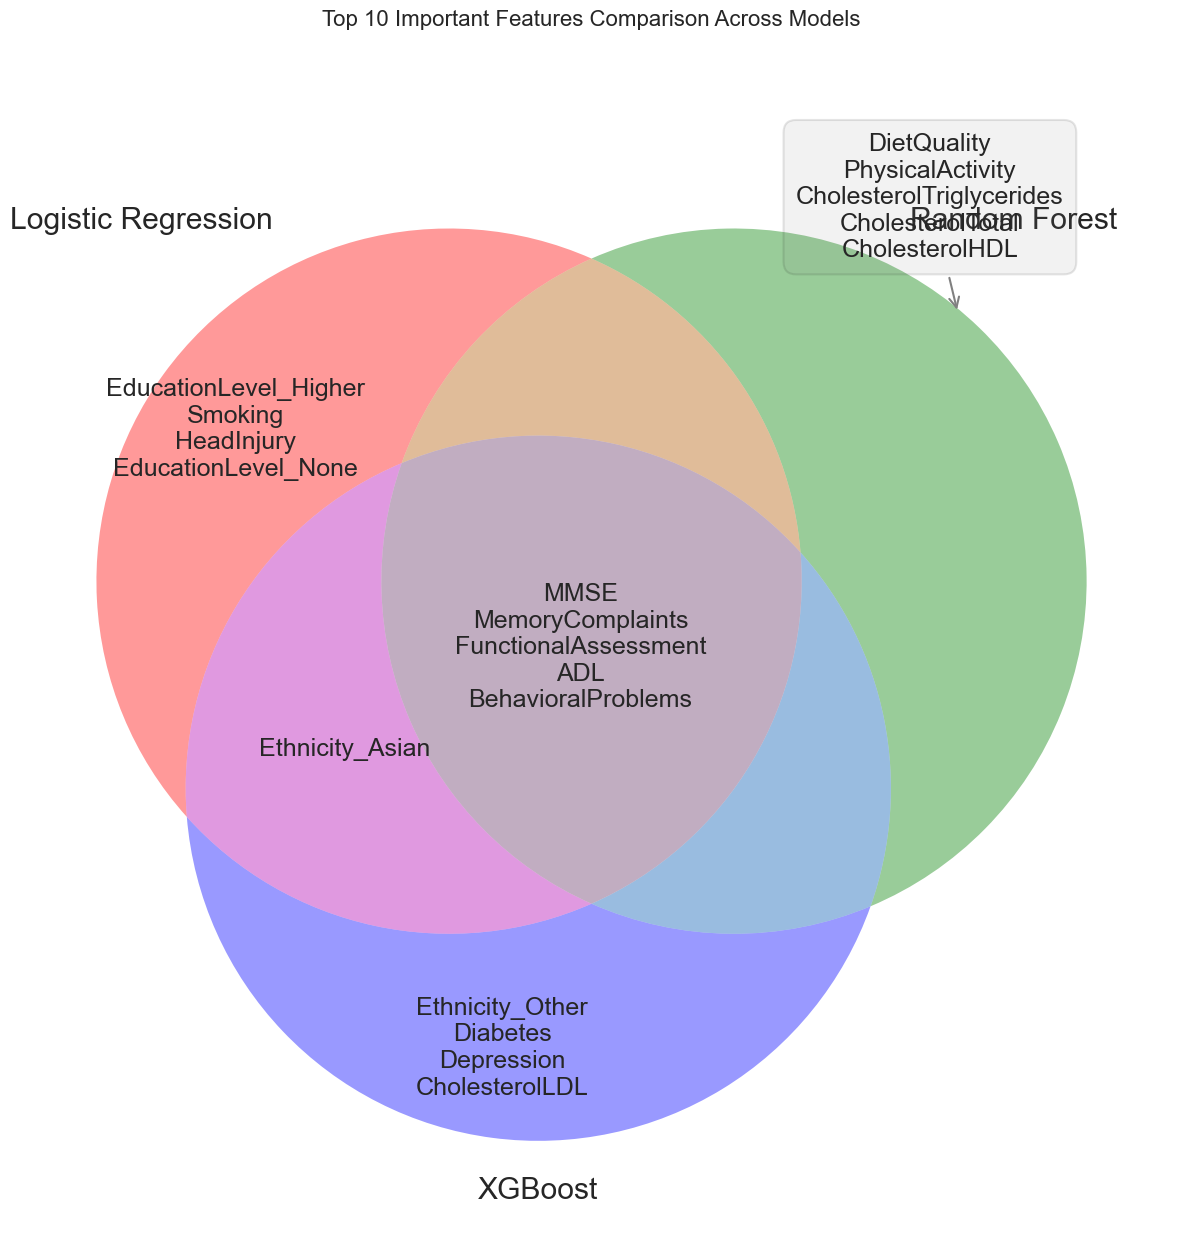

In [64]:
# Use Venn diagram to compare top 10 important features across three models
from matplotlib_venn import venn3

# Extract top 10 features from each model
top_features_logistic = set(logistic_coefficients['Feature'].head(10))
top_features_rf = set(rf_importance['Feature'].head(10))
top_features_xgb = set(xgb_importance['Feature'].head(10))

# Create Venn diagram
plt.figure(figsize=(15, 15))
venn = venn3(
    [top_features_logistic, top_features_rf, top_features_xgb],
    ('Logistic Regression', 'Random Forest', 'XGBoost')
)

# Add labels for each section of the Venn diagram
# Only Logistic Regression
venn.get_label_by_id('100').set_text('\n'.join(top_features_logistic - top_features_rf - top_features_xgb))

# Logistic Regression and Random Forest
venn.get_label_by_id('110').set_text('\n'.join(top_features_logistic & top_features_rf - top_features_xgb))

# Random Forest and XGBoost
venn.get_label_by_id('011').set_text('\n'.join(top_features_rf & top_features_xgb - top_features_logistic))

# Only XGBoost
venn.get_label_by_id('001').set_text('\n'.join(top_features_xgb - top_features_logistic - top_features_rf))

# Logistic Regression and XGBoost
venn.get_label_by_id('101').set_text('\n'.join(top_features_logistic & top_features_xgb - top_features_rf))

# Common to all three models
venn.get_label_by_id('111').set_text('\n'.join(top_features_logistic & top_features_rf & top_features_xgb))

# Only Random Forest
venn.get_label_by_id('010').set_text('')
rf_only = top_features_rf - top_features_logistic - top_features_xgb
if rf_only:
    plt.annotate('\n'.join(rf_only), 
                xy=venn.get_label_by_id('010').get_position() + np.array([0, 0.2]), 
                xytext=(-20, 40), 
                ha='center',
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc', color='gray'))

plt.title('Top 10 Important Features Comparison Across Models', fontsize=16, y=1.1)
plt.show()

## 4. Model Optimization and Feature Selection

From heatmap analysis, we can see that the features with the highest correlation with the target variable are 'ADL','BehavioralProblems','FunctionalAssessment', 'MMSE', and 'MemoryComplaints'. From the feature importance analysis, we can see these features are also the most important features for XGBoost and Random Forest models. Besides, the coefficients of these features in the logistic regression model are also the largest. Therefore, we can select these features for model training and evaluation.

In fact, we can also use the Recursive Feature Elimination (RFE) method to select the most important features. RFE is a feature selection method that recursively removes the least important features and builds the model until the specified number of features is reached. We can use RFE with cross-validation to select the best features for our model.

In [65]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

rfe = RFE(estimator=best_xgb, n_features_to_select=5)
rfe.fit(X_train, y_train)
optimal_features = X_train.columns[rfe.support_].tolist()
print("Optimal Features:", optimal_features)

Optimal Features: ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']


In [66]:
# Get features commonly identified as important by all three models
common_important_features = list(top_features_logistic & top_features_rf & top_features_xgb)
print(f"Features identified as important by all three models ({len(common_important_features)} features):")
print(common_important_features)

Features identified as important by all three models (5 features):
['MMSE', 'MemoryComplaints', 'FunctionalAssessment', 'ADL', 'BehavioralProblems']


### 4.1 Building Models with Optimal Features

In [67]:
# Retrain all models using the optimal feature subset
X_train_optimal = X_train[optimal_features]
X_test_optimal = X_test[optimal_features]

# Train logistic regression model with the optimal feature subset
logistic_model = LogisticRegression()
logistic_param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-2, 2, 200),  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [50, 100, 200]
}

# Use grid search for hyperparameter tuning
logistic_grid_search = GridSearchCV(
    logistic_model, 
    param_grid=logistic_param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
logistic_grid_search.fit(X_train_optimal, y_train)
# Get the best model
optimal_logistic = logistic_grid_search.best_estimator_

# Display best hyperparameters
print("Best hyperparameters for logistic regression:")
logistic_dict = logistic_grid_search.best_params_
print(logistic_dict)

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': np.arange(2, 22, 2)
}

# Use grid search for hyperparameter tuning
rf_grid_search = GridSearchCV(
    rf_model, 
    param_grid=rf_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_grid_search.fit(X_train_optimal, y_train)

# Get the best model
optimal_rf = rf_grid_search.best_estimator_

# Display best hyperparameters
print("Best hyperparameters for Random Frorest:")
rf_dict = rf_grid_search.best_params_
print(rf_dict)

# Train XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='error'
)

# Define hyperparameter grid
xgb_param_grid = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

# Use grid search for hyperparameter tuning
xgb_grid_search = GridSearchCV(
    xgb_model, 
    param_grid=xgb_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_grid_search.fit(X_train_optimal, y_train)

# Get the best model
optimal_xgb = xgb_grid_search.best_estimator_

# Display best hyperparameters
print("Best hyperparameters for XGBoost:")
xgb_dict = xgb_grid_search.best_params_
print(xgb_dict)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best hyperparameters for logistic regression:
{'C': 0.33700643292719284, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 5 folds for each of 1140 candidates, totalling 5700 fits
Best hyperparameters for Random Frorest:
{'max_depth': None, 'min_samples_split': 16, 'n_estimators': 190}
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best hyperparameters for XGBoost:
{'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}


In [68]:
# Evaluate the models with optimal features
evaluate_model(optimal_logistic, X_test_optimal, y_test, "Logistic Regression (Optimal Features)")
evaluate_model(optimal_rf, X_test_optimal, y_test, "Random Froest (Optimal Features)")
evaluate_model(optimal_xgb, X_test_optimal, y_test, "XGBoost (Optimal Features)")

Performance Metrics for Logistic Regression (Optimal Features):
Accuracy: 83.72%
Precision: 80.29%
Recall: 71.90%
F1-Score: 75.86%
ROC-AUC: 90.01%
--------------------------------------------------
Performance Metrics for Random Froest (Optimal Features):
Accuracy: 95.58%
Precision: 96.53%
Recall: 90.85%
F1-Score: 93.60%
ROC-AUC: 95.59%
--------------------------------------------------
Performance Metrics for XGBoost (Optimal Features):
Accuracy: 94.88%
Precision: 95.80%
Recall: 89.54%
F1-Score: 92.57%
ROC-AUC: 95.40%
--------------------------------------------------


### 4.2 Ensemble Learning Model

In [ ]:
# Create ensemble model using StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

# Define base models
estimators = [
    ('lr', LogisticRegression(**logistic_dict)),
    ('rf', RandomForestClassifier(**rf_dict)),
    ('xgb', XGBClassifier(objective='binary:logistic', 
    eval_metric='error', **xgb_dict))
]

# Create stacking classifier
# Create a single-layer MLP as the final estimator
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=MLPClassifier(hidden_layer_sizes=(10,), 
                                  max_iter=500, random_state=42),
    cv=5,
    n_jobs=-1
)

# Fit stacking model
stacking_model.fit(X_train_optimal, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=0.33700643292719284,
                                                   max_iter=50)),
                               ('rf',
                                RandomForestClassifier(min_samples_split=16,
                                                       n_estimators=190)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6, device=None,
                                              early_stopping_rounds=None,
                                              enable_categor...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(10,),
                                                 max_iter=500,
                                                 random_state=42),
                   n_jobs=-1)

In [86]:
# Evaluate stacking model
evaluate_model(stacking_model, X_test_optimal, y_test, model_name="Stacking Ensemble Model (Optimal Features)")

Performance Metrics for Stacking Ensemble Model (Optimal Features):
Accuracy: 95.81%
Precision: 96.55%
Recall: 91.50%
F1-Score: 93.96%
ROC-AUC: 95.39%
--------------------------------------------------


### 4.3 The Importance of Selected Features

In [71]:
# Get the union of important features from 3 original models
all_important_features = list(top_features_logistic | top_features_rf | top_features_xgb)
print(f"Union of important features from all models ({len(all_important_features)} features):")
for i, feature in enumerate(all_important_features):
    print(f"{i+1}. {feature}")

Union of important features from all models (19 features):
1. MMSE
2. Depression
3. PhysicalActivity
4. CholesterolHDL
5. BehavioralProblems
6. Diabetes
7. CholesterolLDL
8. DietQuality
9. FunctionalAssessment
10. Ethnicity_Other
11. CholesterolTriglycerides
12. HeadInjury
13. Ethnicity_Asian
14. EducationLevel_None
15. CholesterolTotal
16. EducationLevel_Higher
17. ADL
18. Smoking
19. MemoryComplaints


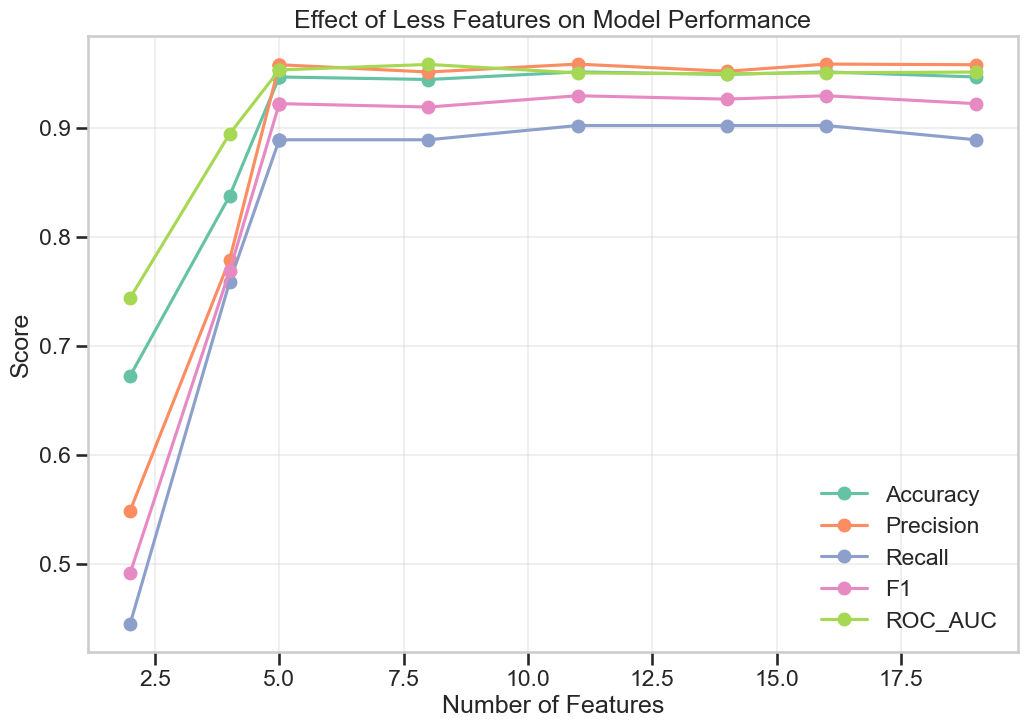

In [72]:
# Test how performance changes with less and less features
results = []
for i in range(10, 0, -1):
    union_top_features = set(logistic_coefficients['Feature'].head(i)).union(set(xgb_importance['Feature'].head(i))).union(rf_importance['Feature'].head(i))
    X_train_union = X_train[list(union_top_features)]
    X_test_union = X_test[list(union_top_features)]
    xgb_union = XGBClassifier()
    xgb_union.fit(X_train_union, y_train)
    y_pred_union = xgb_union.predict(X_test_union)
    y_pred_prob_union = xgb_union.predict_proba(X_test_union)[:, 1]
    # Compute accuracy, recall, precision, and F1-score
    number_of_features = len(union_top_features)
    accuracy = accuracy_score(y_test, y_pred_union)
    recall = recall_score(y_test, y_pred_union)
    precision = precision_score(y_test, y_pred_union)
    fscore = f1_score(y_test, y_pred_union)
    roc_auc_union = roc_auc_score(y_test, y_pred_prob_union)
    results.append([number_of_features, accuracy, recall, precision, fscore, roc_auc_union])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['FeatureCount', 'Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC'])

# Plot effect of less features on each metric
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
for metric in metrics:
    plt.plot(results_df['FeatureCount'], results_df[metric], marker='o', label=metric)
    
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.rcParams['axes.titley'] = 1
plt.title('Effect of Less Features on Model Performance')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [73]:
print("The most important features are \n",
    [*set(logistic_coefficients['Feature'].head(5)).union(set(xgb_importance['Feature'].head(5))).union(rf_importance['Feature'].head(5))], 
    sep='')

The most important features are 
['MMSE', 'BehavioralProblems', 'FunctionalAssessment', 'ADL', 'MemoryComplaints']


## 5. Summary and Discussion

In this Alzheimer's disease prediction project, we compared three classification methods: Logistic Regression, Random Forest, and XGBoost. Through feature selection and model optimization, we can draw the following conclusions:

1. **Model Comparison**: All three models performed well in predicting Alzheimer's disease, with XGBoost and Random Forest slightly outperforming Logistic Regression overall.

2. **Important Features**: MemoryComplaints, FunctionalAssessment, MMSE, ADL, and BehavioralProblems are the most important features for predicting Alzheimer's disease.

3. **Feature Selection**: We found that using 5 features above achieved similar or better prediction performance compared to using all features, while reducing computational complexity.

4. **Ensemble Learning**: The stacking model, which combined the strengths of all three base models, showed more stable performance on the optimal feature subset.

Overall, this study demonstrates the potential of machine learning techniques in early diagnosis and prediction of Alzheimer's disease. In clinical practice, this could provide valuable support for early intervention and treatment planning.